# Brazilian E-Commerce Public Dataset by Olist
![alt text](https://www.cloudways.com/blog/wp-content/uploads/ecommerce-website-checklist-b-.jpg)

Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

---
# Introduction

In this kernel, I would like to analyse Brazilian E-Commerce Public Dataset by Olist, step by step.

I've tried to extract information from the 'customer side' and convert them to observations. By analysing 
how different factors influence purchasing decisions.

---

---
# Data Preparation
- Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import calendar
from pandas.api.types import CategoricalDtype

- Loading the Datasets

In [2]:
customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")
items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
payments = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv")
orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
products = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")
category_translation = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")



-------------------------
# Data Cleaning
- Showing a summary of datasets in one table.
- Checking missing values for each column
- Using dropna() to remove rows with Null/NaN values.

In [3]:
datasets = [customers, items, payments, orders, products, category_translation]
titles = ["customers", "items", "payments", "orders", "products", "category_translation"]

#To gather practical information about all datasets 
info_df = pd.DataFrame({},)
info_df['dataset']= titles
info_df['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]
info_df['cols_no']= [df.shape[1] for df in datasets]
info_df['null_no']= [df.isnull().sum().sum() for df in datasets]
info_df['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
info_df['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df.style.background_gradient(cmap='coolwarm')


,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
2,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
3,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
4,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
5,category_translation,"product_category_name, product_category_name_english",2,0,0,


---
## Data Schema
![alt text](https://i.imgur.com/HRhd2Y0.png)
- As shown in the Data Schema, the datasets that  used in this project, can be merged. Creating one dataset which includes all the columns would be very efficient in this task.

In [4]:
df = pd.merge(orders,payments, on="order_id")
df = df.merge(customers, on="customer_id")
df = df.merge(items, on="order_id")
df = df.merge(products, on="product_id")
df = df.merge(category_translation, on="product_category_name")

df.dropna(inplace=True)  #Keep the DataFrame with valid entries in the same variable

df.info()
df.isnull().sum().sort_values()  # To get the number of missing value in each row if there is still any. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113367 entries, 0 to 115877
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113367 non-null  object 
 1   customer_id                    113367 non-null  object 
 2   order_status                   113367 non-null  object 
 3   order_purchase_timestamp       113367 non-null  object 
 4   order_approved_at              113367 non-null  object 
 5   order_delivered_carrier_date   113367 non-null  object 
 6   order_delivered_customer_date  113367 non-null  object 
 7   order_estimated_delivery_date  113367 non-null  object 
 8   payment_sequential             113367 non-null  int64  
 9   payment_type                   113367 non-null  object 
 10  payment_installments           113367 non-null  int64  
 11  payment_value                  113367 non-null  float64
 12  customer_unique_id            

order_id                         0
product_height_cm                0
product_length_cm                0
product_weight_g                 0
product_photos_qty               0
product_description_lenght       0
product_name_lenght              0
product_category_name            0
freight_value                    0
price                            0
shipping_limit_date              0
seller_id                        0
product_id                       0
order_item_id                    0
product_width_cm                 0
customer_state                   0
customer_zip_code_prefix         0
customer_unique_id               0
payment_value                    0
payment_installments             0
payment_type                     0
payment_sequential               0
order_estimated_delivery_date    0
order_delivered_customer_date    0
order_delivered_carrier_date     0
order_approved_at                0
order_purchase_timestamp         0
order_status                     0
customer_id         

In [5]:
df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
42731,bee9e2345c4d8f186d2aa7d57e1589f3,be32bd080b6202c0024e3065140711aa,delivered,2017-05-23 18:31:34,2017-05-24 18:35:17,2017-05-25 14:55:49,2017-05-30 08:05:07,2017-06-20 00:00:00,1,credit_card,...,19.73,informatica_acessorios,59.0,636.0,1.0,900.0,40.0,15.0,20.0,computers_accessories
66913,5b514a1a40e8cd51a1f35c2df28da032,7f3bcd2349e4a230e5e55ce40a0a9027,delivered,2018-07-17 20:57:14,2018-07-17 21:05:17,2018-07-27 11:54:00,2018-08-04 17:50:39,2018-08-03 00:00:00,1,credit_card,...,30.11,beleza_saude,50.0,1257.0,1.0,700.0,25.0,12.0,19.0,health_beauty
42942,c76a39319cf13b7f3b9e3bded3315f86,5703f4cb0c712d838bee4c53f7655c6a,delivered,2017-05-11 01:40:51,2017-05-11 01:50:15,2017-05-15 13:16:51,2017-05-19 09:04:57,2017-05-31 00:00:00,1,credit_card,...,15.23,informatica_acessorios,48.0,561.0,2.0,593.0,41.0,13.0,14.0,computers_accessories
5794,dbe2e048ec0057accc15716fa929c405,2139fae6ad1c50179e563f68b09d4388,delivered,2018-08-19 11:08:19,2018-08-20 11:30:19,2018-08-22 11:40:00,2018-08-29 17:30:11,2018-09-11 00:00:00,1,credit_card,...,27.11,utilidades_domesticas,46.0,786.0,4.0,2550.0,53.0,25.0,20.0,housewares
19189,7e582bf07e775814ee561ea660528808,c5208f60e08f7bfe285a7d7f9b179c0a,delivered,2018-04-12 15:09:11,2018-04-13 13:14:19,2018-04-17 21:22:36,2018-04-27 23:48:57,2018-05-08 00:00:00,1,credit_card,...,17.93,papelaria,46.0,440.0,1.0,1400.0,16.0,7.0,12.0,stationery
90989,7844eebb3536df34f62c7b819ac8c4d2,5e5564ba592b4a8ef0130a0f78356a16,delivered,2018-04-26 10:53:16,2018-04-27 08:12:15,2018-04-27 14:03:00,2018-05-08 21:58:47,2018-05-22 00:00:00,1,credit_card,...,56.79,relogios_presentes,52.0,616.0,1.0,328.0,20.0,14.0,18.0,watches_gifts
28462,96eb7f709abac11cbb2502c63d8c1ae6,530d2038f10bff32ab518da55c93cb0a,delivered,2017-11-24 08:40:31,2017-11-24 09:50:40,2017-11-24 22:44:36,2017-12-08 00:47:50,2017-12-15 00:00:00,1,credit_card,...,14.28,moveis_decoracao,50.0,1181.0,3.0,2600.0,53.0,8.0,11.0,furniture_decor
18108,f3af8efd535804214ce63f6b29386312,08972c9a494a9ed1a7a73df4d0bc5b58,delivered,2017-08-08 13:20:59,2017-08-09 02:55:17,2017-08-11 17:16:09,2017-08-21 18:44:31,2017-09-05 00:00:00,1,boleto,...,25.24,papelaria,56.0,342.0,1.0,2500.0,17.0,44.0,34.0,stationery
30224,56b8dfac98a87021344bae2675b86709,7dfa275c9be7b674f7e11671486f00b3,delivered,2017-11-05 12:10:00,2017-11-06 13:31:25,2017-11-16 11:03:27,2017-11-23 22:41:40,2017-12-11 00:00:00,1,credit_card,...,77.40,moveis_escritorio,19.0,930.0,1.0,12775.0,37.0,65.0,36.0,office_furniture
9882,f535aa868b3671ad61668d0f6cd3a5dc,5bdabb0382d0e9b16869f7e6b1ccda55,delivered,2017-05-23 17:22:06,2017-05-23 17:35:09,2017-05-24 15:39:30,2017-05-31 09:13:57,2017-06-14 00:00:00,1,credit_card,...,33.64,perfumaria,58.0,648.0,3.0,450.0,22.0,16.0,16.0,perfumery




---


---
# Questions


**1. How e_commerce has evolved over time in Brazil?**

**2. What is top 10 products?**

**3. What is average price on each product category?**



**4. On what days of week brazilians customers tend to do online shopping?**

**5. How customers are distributed over the states?**

**6. How many payment methods are available? and which one is the most popular?**

**7. Is there a correlation between the freight value and item's price?**

**8. Is there a correlation between the freight value and item's weight?**


----------------------------------------------------
----



- Let's have a look at e_commerce evolution over time from 2016 to 2018 in Brazil.









Text(0.5, 1.0, 'Years')

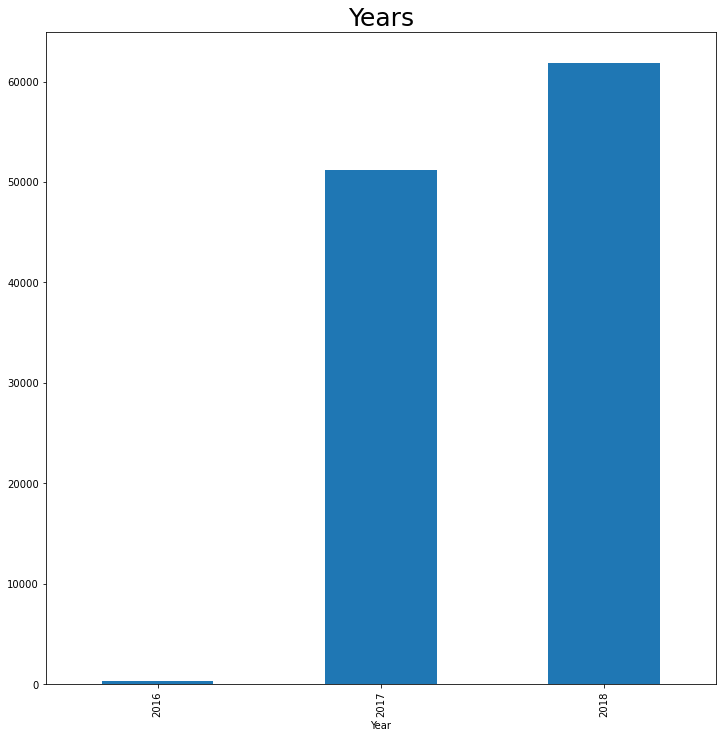

In [6]:
#'order_purchase_timestamp' and 'order_delivered_customer_date' are object 
df[['order_purchase_timestamp', 'order_delivered_customer_date']]=df[['order_purchase_timestamp', 'order_delivered_customer_date']].apply(pd.to_datetime)

# To extract "year" from date. 
df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(
    kind = 'bar',
    figsize=(12,12),  
)
plt.title('Years',fontsize=25)

Text(0.5, 1.0, 'Years')

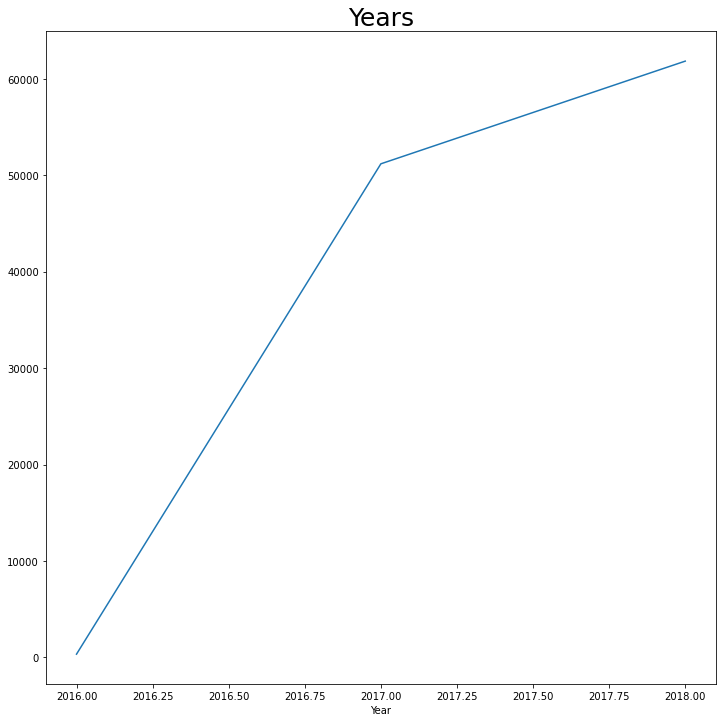

In [7]:
df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(
    kind = 'line',
    figsize=(12,12)
)
plt.title('Years',fontsize=25)

- It is obvious there is a huge jump from 2016 to 2017. However growing from 2017 to 2018 is quite steady.

In [8]:
df['Year']  # Check column 'Year' values to check it be right.

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
115873    2018
115874    2018
115875    2018
115876    2017
115877    2017
Name: Year, Length: 113367, dtype: int64

- Let's have a look at online purchasing per  month individually.

Text(0.5, 1.0, 'Months')

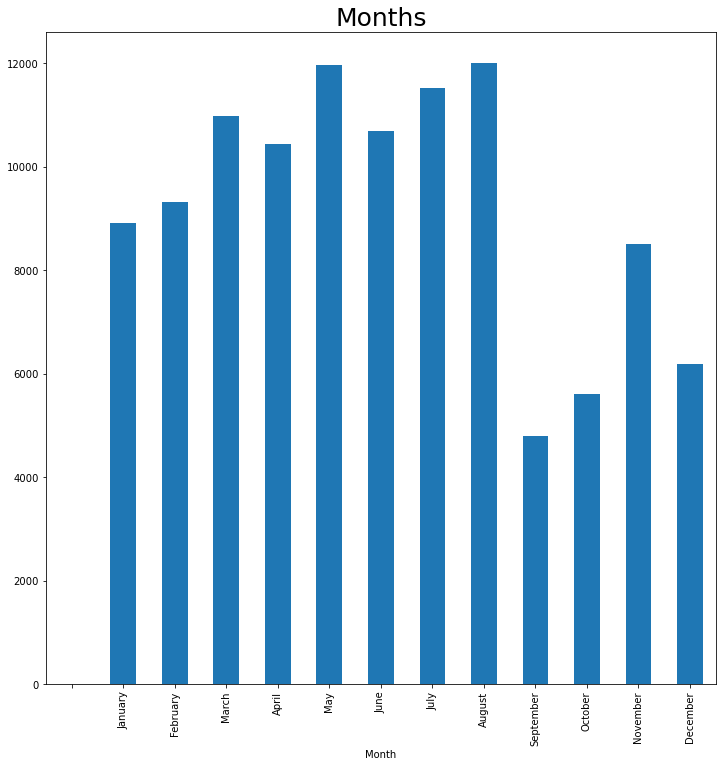

In [9]:
df['Month'] =  pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.month_name(), categories=list(calendar.month_name)))
df['Month']
df.groupby('Month').size().plot(
    kind = 'bar',
    figsize=(12,12)
)
plt.title('Months',fontsize=25)

Text(0.5, 1.0, 'Months')

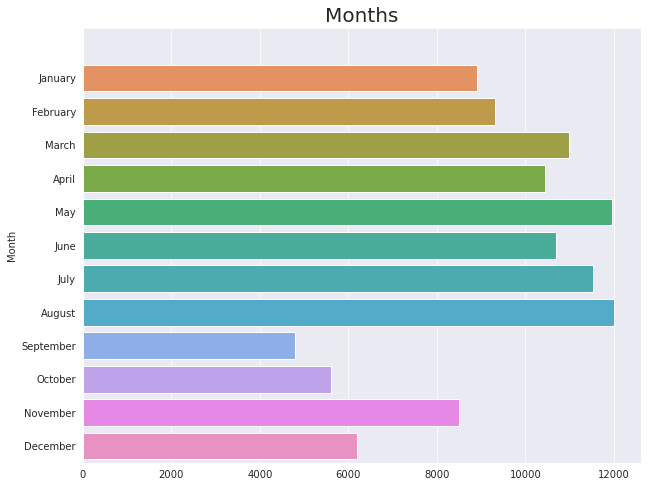

In [10]:
month = df.groupby('Month').size().sort_values()
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=month.index, x=month.values)
plt.title('Months',fontsize=20)

- I expected November( Black Friday) or December(X-mas) to have the highest value. It could happen either because the whole data not used or there are more important events over other months in Brazil.

- In the follwing part, months and years are joined. It's beneficial to observe months of each year at the same time.

In [11]:
df['MonthY'] = df['order_purchase_timestamp'].dt.strftime('%b%Y')
df['MonthY']

0         Oct2017
1         Oct2017
2         Oct2017
3         Aug2017
4         Aug2017
           ...   
115873    Aug2018
115874    Jul2018
115875    Jul2018
115876    Jan2017
115877    Sep2017
Name: MonthY, Length: 113367, dtype: object

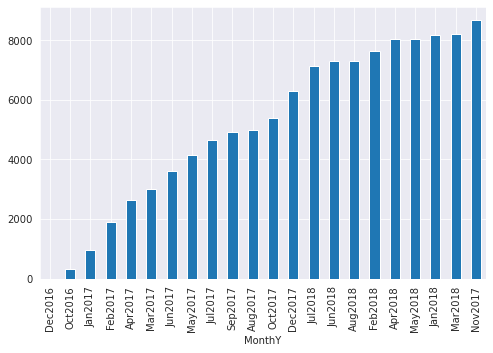

In [12]:
df.groupby('MonthY').size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)

Text(0.5, 1.0, 'Month_Year')

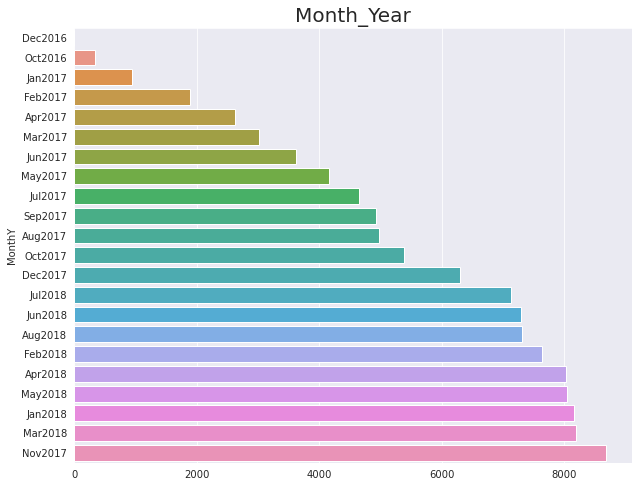

In [13]:
Month_Year = df.groupby('MonthY').size().sort_values()

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=Month_Year.index, x=Month_Year.values)
plt.title('Month_Year',fontsize=20)

- It's good to know on what days of week,the Brazilians spend more time on online shopping. It helps the retailers to offer promotions at right time. 

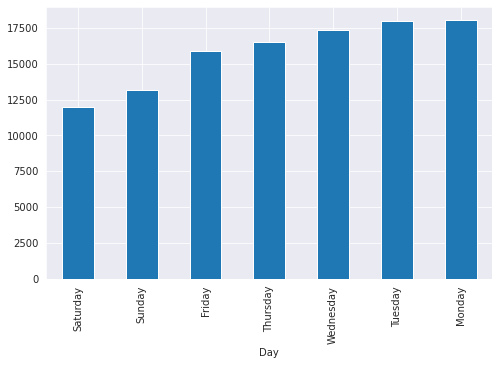

In [14]:
df['Day'] = pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.day_name(), categories=list(calendar.day_name)))
df.groupby('Day').size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)

Text(0.5, 1.0, 'Days')

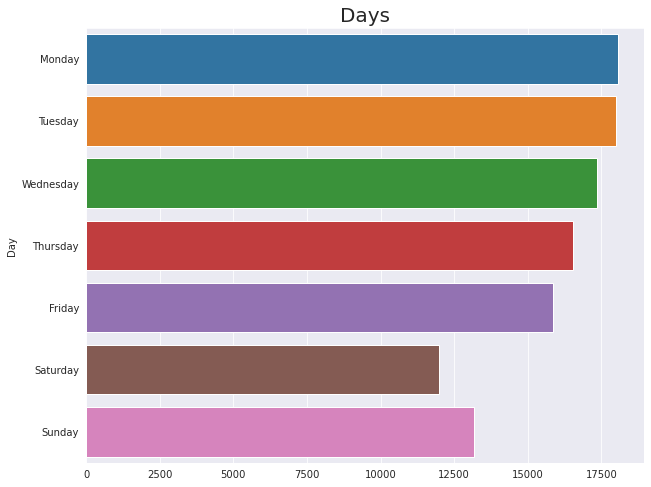

In [15]:
 day = df.groupby('Day').size().sort_values()

 fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=day.index, x=day.values)
plt.title('Days',fontsize=20)

- We can see more online shopping happen on weekdays and less on weekends.




---
# Top 10 Product

- There is no name for the items in the dataset, each item has item_id. Therefore we relate each item by category which belongs to.
Below the top 10 popular categories are obtained.

Text(0.5, 1.0, 'Top 10 product category')

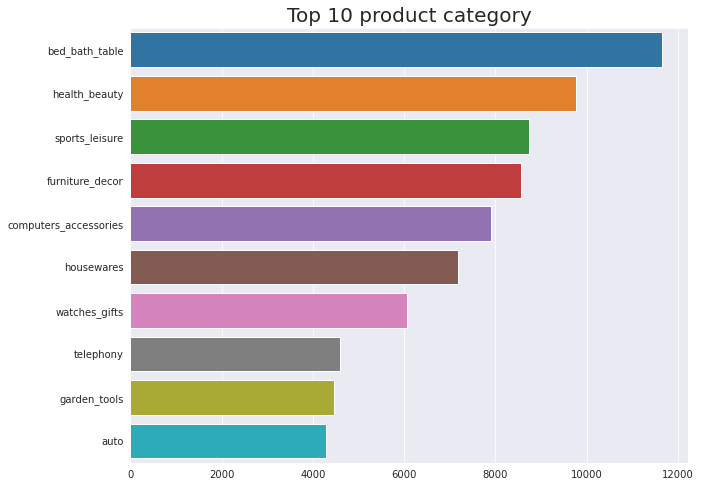

In [16]:
top_10_category = df["product_category_name_english"].value_counts().sort_values(ascending=False)[:10]

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=top_10_category.index, x=top_10_category.values)
plt.title('Top 10 product category',fontsize=20)

In [17]:
top_10_category

bed_bath_table           11649
health_beauty             9761
sports_leisure            8731
furniture_decor           8553
computers_accessories     7897
housewares                7172
watches_gifts             6063
telephony                 4601
garden_tools              4463
auto                      4283
Name: product_category_name_english, dtype: int64



---


- Average price on each category:

Text(0.5, 1.0, 'average_price')

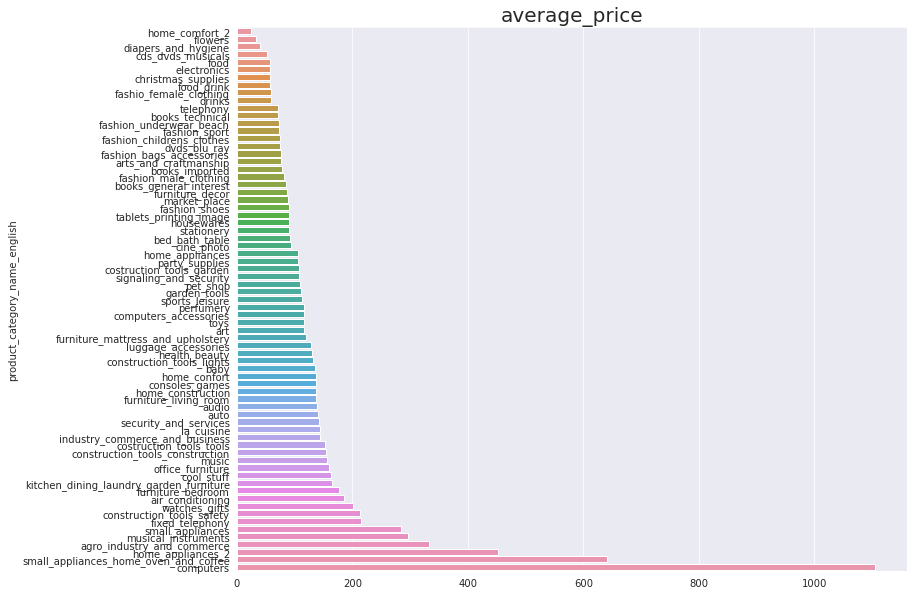

In [18]:
average_price = df.groupby("product_category_name_english")["price"].agg(np.mean).sort_values()
average_price 
fig=plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.barplot(y=average_price.index, x=average_price.values)
plt.title('average_price',fontsize=20)

In [19]:
average_price.sample(10)

product_category_name_english
sports_leisure                       113.436919
audio                                138.445688
fashion_sport                         72.224828
fashion_childrens_clothes             74.278571
furniture_mattress_and_upholstery    119.779500
luggage_accessories                  127.780993
furniture_living_room                137.486327
health_beauty                        130.254398
cine_photo                            94.174225
office_furniture                     159.306087
Name: price, dtype: float64

---
- Average price of the 'Top 10 category' :

In [20]:
top_category = df[df['product_category_name_english'].isin(top_10_category.index)]
price_top_category=round(top_category.groupby("product_category_name_english")["price"].agg(np.mean).sort_values(ascending=False), 2)
price_top_category

#Prices are in Brazilian currency.

product_category_name_english
watches_gifts            200.09
auto                     140.76
health_beauty            130.25
computers_accessories    116.35
sports_leisure           113.44
garden_tools             110.30
bed_bath_table            92.53
housewares                90.38
furniture_decor           87.19
telephony                 70.73
Name: price, dtype: float64

Text(0.5, 1.0, 'average_price')

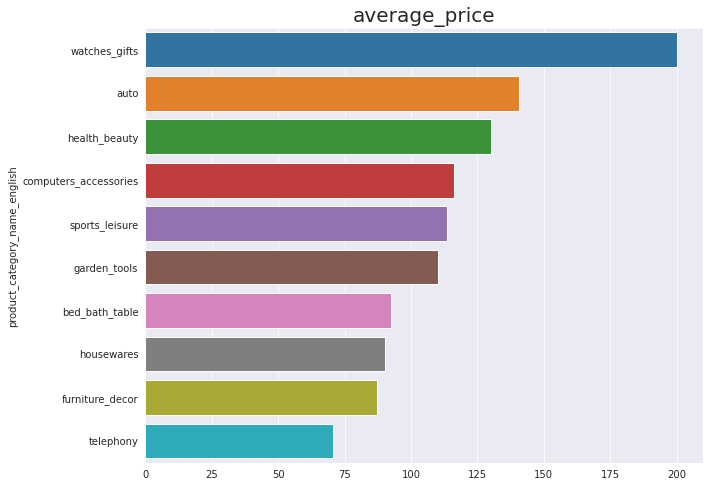

In [21]:
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=price_top_category.index, x=price_top_category.values)
plt.title('average_price',fontsize=20)

Text(0.5, 1.0, 'Average Price')

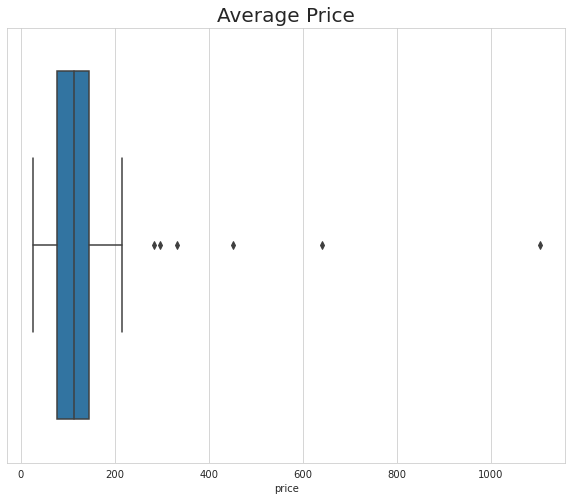

In [22]:

fig=plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.boxplot(x=average_price)
plt.title('Average Price',fontsize=20)

Text(0.5, 1.0, 'Top Categories Average Price')

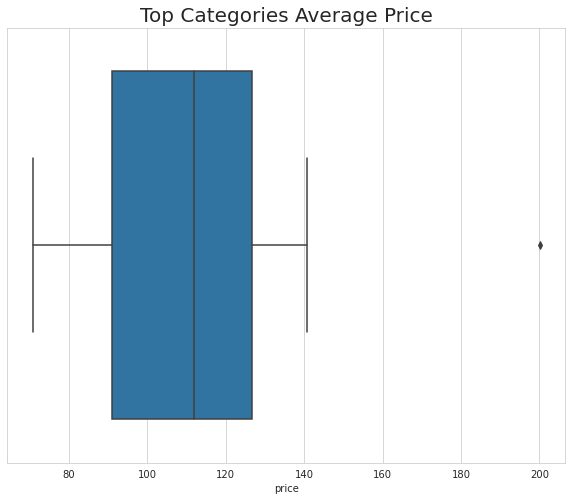

In [23]:
fig=plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.boxplot(x=price_top_category)
plt.title('Top Categories Average Price',fontsize=20)

---
#  Payments

- How many different of payment are available in Brazil's e_commerce?

In [24]:
df.payment_type.sample(15)

104749        voucher
84898     credit_card
22331     credit_card
89205         voucher
71232     credit_card
62637     credit_card
115261    credit_card
92451     credit_card
9271      credit_card
77526     credit_card
64048          boleto
41619          boleto
58921     credit_card
17981     credit_card
46726          boleto
Name: payment_type, dtype: object

In [25]:
df.payment_type.nunique()

4

In [26]:
df.payment_type.unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

- What is the most frequent payment type?

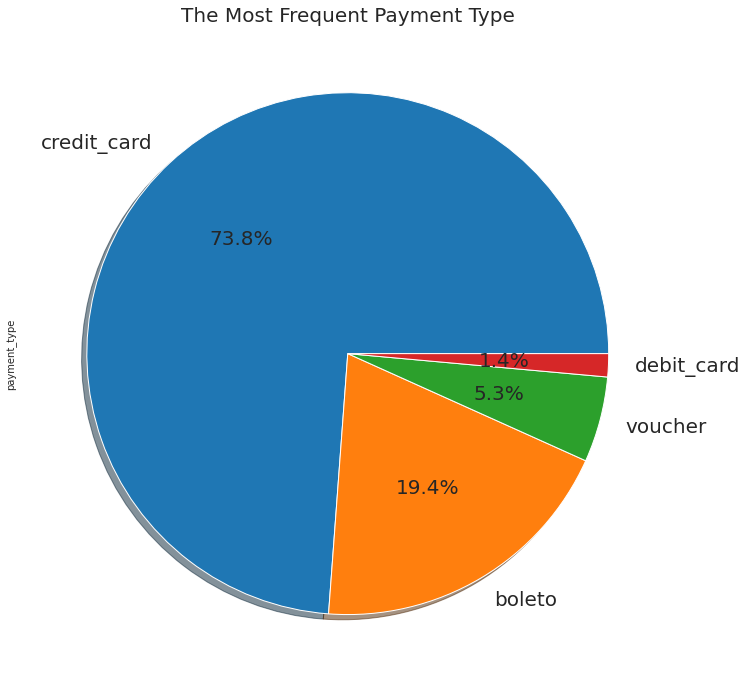

In [27]:
df["payment_type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=20,
    figsize=(12,12),
    shadow=True
    
)
plt.title('The Most Frequent Payment Type'.title() , fontsize=20);

- Payment methods per each year:

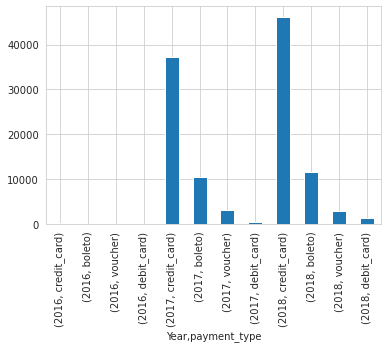

In [28]:
df.groupby("Year")['payment_type'].value_counts().plot(kind='bar')

*The most commen payment method is "Credit Card".

*Boleto bancário is Brazil’s most popular cash-based payment method that is virtually fraud-proof. The payment method generates over 3.7 billion transactions per year and dominates 25% of all online payment transactions.

------
# Customer


![alt text](https://st4.depositphotos.com/1374738/23094/v/950/depositphotos_230940566-stock-illustration-map-brazil-divisions-states.jpg)

- Customers distribution over the states.

In [29]:
top_states = df["customer_state"].value_counts()
top_states

SP    47819
RJ    14648
MG    13230
RS     6282
PR     5790
SC     4161
BA     3858
DF     2389
GO     2319
ES     2288
PE     1803
CE     1482
PA     1070
MT     1067
MS      826
MA      808
PB      614
RN      555
PI      546
AL      437
SE      384
TO      330
RO      275
AM      167
AC       92
AP       83
RR       44
Name: customer_state, dtype: int64

Text(0.5, 1.0, 'states')

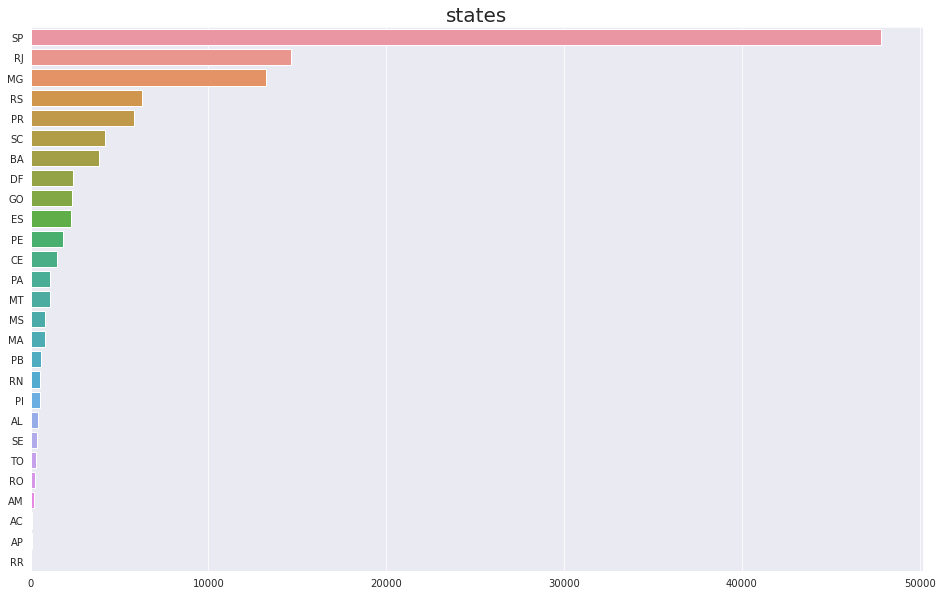

In [30]:
fig=plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.barplot(y=top_states.index, x=top_states.values)
plt.title('states',fontsize=20)

- Most customers are from Sao Paulo, followed by Rio de Janeiro.
---

- derivery_time:The time between purchasing date and reaching to destination

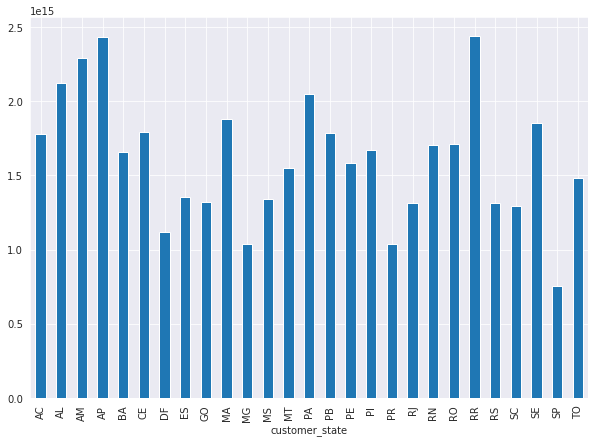

In [31]:
df['derivery_time'] = df['order_delivered_customer_date'].astype(int)- df['order_purchase_timestamp'].astype(int)

delivery_per_state = df.groupby("customer_state")['derivery_time'].mean()
delivery_per_state.plot(
    kind='bar',
    figsize=(10,7)
)

- The longest delivery time belongs to the State of Paraiba. We don't have sellers' dataset here to compare the distance between the origin (seller's location) and destination(buyer's location).



---
#  correlation Between Features
- correlation indicates the interdependence between two or more variables. The value of correlation lies between -1 and 1.
By the way, Correlation doesn't imply Causation.

In [32]:
#This function colours values.
def adding_colour(val):
  if val < 0:
    color = 'red'
  elif val < 1:
    color = 'green'
  else:
    color = 'black'      
  return 'color: %s' % color


corr = df.corr().style.applymap(adding_colour) #To apply a function to a data frame we should use the .applymap() method
corr

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Year,derivery_time
payment_sequential,1.000000,-0.087636,-0.065092,-0.028489,-0.000320,0.000263,0.008459,-0.001524,-0.010569,-0.008694,0.026018,0.030589,0.020725,0.030398,-0.043490,0.003093
payment_installments,-0.087636,1.000000,0.274281,0.057973,0.074173,0.279455,0.186467,0.020894,0.036633,-0.000140,0.179123,0.116260,0.120540,0.136901,-0.050385,0.044075
payment_value,-0.065092,0.274281,1.000000,0.053122,0.266621,0.736578,0.372554,0.004857,0.157190,0.010524,0.305568,0.138097,0.216583,0.148412,0.005173,0.059970
customer_zip_code_prefix,-0.028489,0.057973,0.053122,1.000000,0.000096,0.041988,0.225342,0.015727,0.024201,0.020937,0.001095,0.003634,0.011632,-0.010012,-0.034051,0.271203
order_item_id,-0.000320,0.074173,0.266621,0.000096,1.000000,-0.060447,-0.030354,-0.022327,-0.013924,-0.053845,-0.003713,0.005238,0.030102,-0.009827,0.003946,-0.016317
price,0.000263,0.279455,0.736578,0.041988,-0.060447,1.000000,0.414941,0.019762,0.200803,0.053147,0.339658,0.142934,0.222948,0.173005,-0.001062,0.061150
freight_value,0.008459,0.186467,0.372554,0.225342,-0.030354,0.414941,1.000000,0.025235,0.094763,0.022578,0.612538,0.304098,0.391665,0.322947,0.036205,0.213206
product_name_lenght,-0.001524,0.020894,0.004857,0.015727,-0.022327,0.019762,0.025235,1.000000,0.090553,0.145421,0.022596,0.062140,-0.029768,0.063204,0.018876,-0.002724
product_description_lenght,-0.010569,0.036633,0.157190,0.024201,-0.013924,0.200803,0.094763,0.090553,1.000000,0.118356,0.059616,0.004004,0.073089,-0.068854,0.037143,0.005663
product_photos_qty,-0.008694,-0.000140,0.010524,0.020937,-0.053845,0.053147,0.022578,0.145421,0.118356,1.000000,0.022557,0.047030,-0.033792,0.008398,-0.005956,-0.026865


---


- Correlation between the freight value and item's price:

In [33]:
round(df['freight_value'].corr(df['price']), 2)

0.41

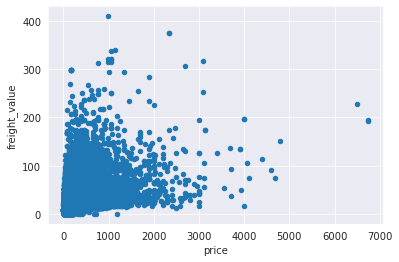

In [34]:
df.plot(
    kind = 'scatter',
    x = 'price',
    y = 'freight_value',
)

- Correlation between the freight value and item's weight:

In [35]:
round(df['freight_value'].corr(df['product_weight_g']), 2)

0.61

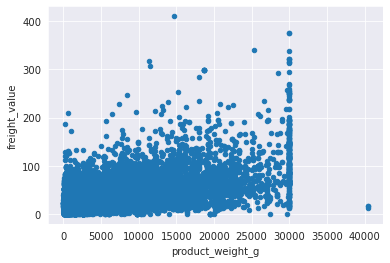

In [36]:
df.plot(
    kind = 'scatter',
    x = 'product_weight_g',
    y = 'freight_value',
)

- There is moderate correlation between freight value, item's price and item's weight.

----
# Covariance
Covariance measures the directional relationship between the returns on two assets. A positive covariance means that asset returns move together while a negative covariance means they move inversely.

In [37]:
def add_colour(val):
  if val < 0:
    color = 'red'
  else:
    color = 'green'      
  return 'color: %s' % color

cov = df.cov().style.applymap(add_colour)
cov

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Year,derivery_time
payment_sequential,0.465288,-0.166055,-11.836070,-579.985028,-0.000153,0.032788,0.090900,-0.010417,-4.693542,-0.010203,66.917248,0.337217,0.190121,0.243454,-0.014954,1721521023894.500488
payment_installments,-0.166055,7.716428,203.107374,4806.354585,0.144501,141.838425,8.159839,0.581478,66.248812,-0.000669,1876.142636,5.219472,4.503135,4.465100,-0.070553,99911973611246.281250
payment_value,-11.836070,203.107374,71062.828028,422641.896380,49.846437,35876.844129,1564.523976,12.970756,27279.739213,4.826012,307138.022598,594.968179,776.466157,464.521425,0.695170,13045809455290620.000000
customer_zip_code_prefix,-579.985028,4806.354585,422641.896380,890751698.583065,2.013209,228969.200005,105948.166280,4702.510719,470223.482857,1074.994540,123245.967554,1752.984223,4668.791054,-3508.333099,-512.293132,6605271420769200128.000000
order_item_id,-0.000153,0.144501,49.846437,2.013209,0.491856,-7.745850,-0.335360,-0.156874,-6.357235,-0.064963,-9.817889,0.059365,0.283914,-0.080923,0.001395,-9338531186335.505859
price,0.032788,141.838425,35876.844129,228969.200005,-7.745850,33384.734814,1194.352566,36.175913,23885.708954,16.705533,234003.066109,422.083505,547.842155,371.147986,-0.097809,9117829735442210.000000
freight_value,0.090900,8.159839,1564.523976,105948.166280,-0.335360,1194.352566,248.167195,3.982794,971.859342,0.611866,36383.969960,77.423610,82.978220,59.733642,0.287506,2740874122076150.000000
product_name_lenght,-0.010417,0.581478,12.970756,4702.510719,-0.156874,36.175913,3.982794,100.372648,590.617073,2.506352,853.595962,10.061651,-4.010842,7.434827,0.095328,-22274052372685.253906
product_description_lenght,-4.693542,66.248812,27279.739213,470223.482857,-6.357235,23885.708954,971.859342,590.617073,423824.800372,132.553048,146339.174892,42.125181,639.913497,-526.304943,12.189151,3008663243060373.500000
product_photos_qty,-0.010203,-0.000669,4.826012,1074.994540,-0.064963,16.705533,0.611866,2.506352,132.553048,2.959455,146.317877,1.307587,-0.781809,0.169620,-0.005165,-37714926864769.781250


In [38]:
round(df['freight_value'].cov(df['price']), 2)

1194.35

In [39]:
round(df['freight_value'].cov(df['product_weight_g']), 2)

36383.97



---



---



---


# Acknowledgement
Thanks to Olist for releasing this dataset and Kaggle website to share it.

Thanks to Dr Rachid Hamadi, Dr Weicong Kong and teaching team for helping me through this course. 

 I got inspired from the Kaggle users' notebooks, learnt a lot and created my own EDA.
 
  Hope you liked my project.

references:
- https://www.kaggle.com/olistbr/brazilian-ecommerce
- https://www.cloudways.com/blog/ecommerce-website-checklist/
- https://stackoverflow.com/

- https://wdrfree.com/stock-vector/download/map-of-brazil-with-divisions-of-states-230940566

- https://medium.com/@kristina.reut96/you-think-you-know-stylish-tables-ee59beadb487

- https://docs.paymentwall.com/payment-method/boleto